<a href="https://colab.research.google.com/github/quguit/Manchine-Learning/blob/main/dog_vs_cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import zipfile
import tensorflow as tf
from google.colab import drive
import shutil
from shutil import move
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
zip_file = '/content/drive/MyDrive/CNN/dogs-vs-cats/dogs-vs-cats.zip'
output_dir = '/content/dogs-vs-cats'


with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(output_dir)


# Definir o caminho para o arquivo ZIP
zip_path = '/content/drive/MyDrive/CNN/dogs-vs-cats/dogs-vs-cats.zip'

# Criar um diretório para extrair os arquivos
extract_dir = '/content/dogs-vs-cats'
os.makedirs(extract_dir, exist_ok=True)

# Extrair o conteúdo do arquivo ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

train_zip = os.path.join(output_dir, '/content/dogs-vs-cats/train.zip')
test_zip = os.path.join(output_dir,'/content/dogs-vs-cats/test1.zip')

with zipfile.ZipFile(train_zip, 'r') as zip_ref:
    zip_ref.extractall(os.path.join(output_dir, 'train'))

with zipfile.ZipFile(test_zip, 'r') as zip_ref:
    zip_ref.extractall(os.path.join(output_dir, 'test'))

In [ ]:
train_dir = os.path.join(output_dir, 'train')
cats_dir = os.path.join(train_dir, 'cats')
dogs_dir = os.path.join(train_dir, 'dogs')

os.makedirs(cats_dir, exist_ok=True)
os.makedirs(dogs_dir, exist_ok=True)

In [ ]:
# Diretório onde as imagens estão atualmente
source_dir = 'dogs-vs-cats/train/train'

# Diretórios para gatos e cachorros
cats_dir = 'dogs-vs-cats/train/cats'
dogs_dir = 'dogs-vs-cats/train/dogs'

# Criar os diretórios de gatos e cachorros se ainda não existirem
os.makedirs(cats_dir, exist_ok=True)
os.makedirs(dogs_dir, exist_ok=True)

# Mover as imagens de gatos e cachorros para seus respectivos diretórios
for filename in os.listdir(source_dir):
    if filename.startswith('cat'):
        shutil.move(os.path.join(source_dir, filename), os.path.join(cats_dir, filename))
    elif filename.startswith('dog'):
        shutil.move(os.path.join(source_dir, filename), os.path.join(dogs_dir, filename))

print("Imagens organizadas nas pastas cats e dogs com sucesso!")

Imagens organizadas nas pastas cats e dogs com sucesso!


In [ ]:
cat_images = os.listdir(cats_dir)
dog_images = os.listdir(dogs_dir)

train_cats, val_cats = train_test_split(cat_images, test_size=0.2, random_state=42)
train_dogs, val_dogs = train_test_split(dog_images, test_size=0.2, random_state=42)


In [ ]:

import tensorflow as tf

# Definindo diretórios
train_dir = 'dogs-vs-cats/train'
test_dir = 'dogs-vs-cats/test'  # Adicionando diretório de teste
val_split = 0.2  # definindo validação como 20%

# Carregando dataset de treino e separando para validação
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=val_split,
    subset='training',
    seed=42,
    image_size=(128, 128),
    batch_size=32
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=val_split,
    subset='validation',
    seed=42,
    image_size=(128, 128),
    batch_size=32

)

# Carregando dataset de teste com rótulos inferidos
test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    image_size=(128, 128),
    batch_size=32,
    shuffle=False
)




Found 25000 files belonging to 3 classes.
Using 20000 files for training.
Found 25000 files belonging to 3 classes.
Using 5000 files for validation.
Found 12500 files belonging to 1 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model = Sequential([
    Conv2D(256, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(1, activation='sigmoid'),  # Alterado para um neurônio
])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.00001)

# Compilação
adam = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Resumo do modelo
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_64 (Conv2D)                   │ (None, 126, 126, 256)       │           7,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_64 (MaxPooling2D)      │ (None, 63, 63, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_65 (Conv2D)                   │ (None, 61, 61, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_65 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_66 (Conv2D)                   │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_66 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_67 (Conv2D)                   │ (None, 12, 12, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_67 (MaxPooling2D)      │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_17 (Flatten)                 │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1)                   │           1,153 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 395,617 (1.51 MB)

 Trainable params: 395,617 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Treinamento
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=20,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 65s 87ms/step - accuracy: 0.5370 - loss: 1.4318 - val_accuracy: 0.6172 - val_loss: 0.6476 - learning_rate: 0.0010
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 72s 86ms/step - accuracy: 0.6365 - loss: 0.6351 - val_accuracy: 0.6144 - val_loss: 0.6668 - learning_rate: 0.0010
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 78ms/step - accuracy: 0.7067 - loss: 0.5732 - val_accuracy: 0.7232 - val_loss: 0.5531 - learning_rate: 0.0010
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 78ms/step - accuracy: 0.7233 - loss: 0.5499 - val_accuracy: 0.7646 - val_loss: 0.4974 - learning_rate: 0.0010
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 79ms/step - accuracy: 0.7694 - loss: 0.4864 - val_accuracy: 0.7560 - val_loss: 0.5229 - learning_rate: 0.0010
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 78ms/step - accuracy: 0.8003 - loss: 0.4337 - val_accuracy: 0.7830 - val_loss: 0.4593 - learning_rate: 0.0010
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 78ms/step - accuracy: 0.8195 - l

In [ ]:
# previsões do modelo
predictions = model.predict(test_dataset)

# Exibir
print(predictions)


391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step
[[0.73125565]
 [0.01432903]
 [0.09626566]
 ...
 [0.99966824]
 [0.5893617 ]
 [0.99999523]]


391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.4675 - loss: 2.3366
Test accuracy: 0.4627


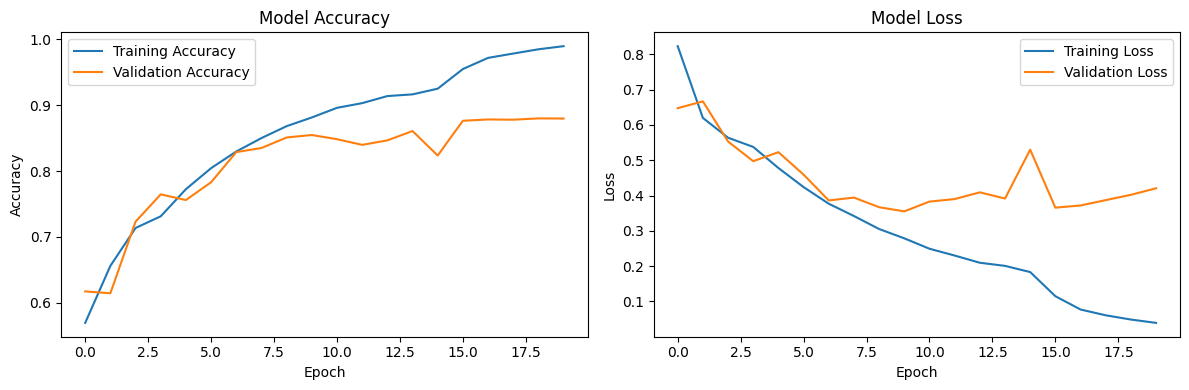

In [ ]:
# Avaliação no conjunto de teste
test_loss, test_accuracy = model.evaluate(test_dataset)

print(f"Test accuracy: {test_accuracy:.4f}")


# Plotar histórico de treinamento
import matplotlib.pyplot as plt

# Verifica se history está definido
if 'history' in locals():
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()
else:
    print("O histórico de treinamento não foi encontrado.")
